In [1]:
import numpy as np
# from arsf_envi_reader import envi_header


import json
import math
# import affine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from osgeo import gdal,ogr,osr


import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np


# from tqdm import tqdm
# import multiprocess as mp
from numpy import trapz

In [2]:
# la_trait_img = gdal.Open(r'D:\Wenqu_Mark_2022\site1b_radiance\multi_or_64736_radiant')
la_trait_img = gdal.Open(r'F:\wenqu\trait_map\site2a_la_trait_map.tiff').ReadAsArray() 


In [3]:
xmin = la_trait_img.min()
xmax = la_trait_img.max()
xmin, xmax

(-0.29392788, 0.47192937)

In [4]:
eval_points = np.linspace(np.min(la_trait_img), np.max(la_trait_img))

In [5]:
eval_points

array([-0.29392788, -0.27829814, -0.2626684 , -0.24703866, -0.23140892,
       -0.21577918, -0.20014944, -0.1845197 , -0.16888996, -0.15326022,
       -0.13763048, -0.12200074, -0.106371  , -0.09074126, -0.07511152,
       -0.05948178, -0.04385204, -0.0282223 , -0.01259256,  0.00303718,
        0.01866692,  0.03429666,  0.0499264 ,  0.06555614,  0.08118588,
        0.09681562,  0.11244536,  0.1280751 ,  0.14370484,  0.15933458,
        0.17496432,  0.19059406,  0.2062238 ,  0.22185353,  0.23748327,
        0.25311301,  0.26874275,  0.28437249,  0.30000223,  0.31563197,
        0.33126171,  0.34689145,  0.36252119,  0.37815093,  0.39378067,
        0.40941041,  0.42504015,  0.44066989,  0.45629963,  0.47192937])

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde
import seaborn as sns
from sklearn.neighbors import KernelDensity


In [9]:
x = la_trait_img.reshape([-1,1])
x.shape

(28798142, 1)

In [12]:
kde_sk = KernelDensity(bandwidth=0.001, kernel='gaussian')
kde_sk.fit(la_trait_img.reshape([-1,1]))
y_sk = np.exp(kde_sk.score_samples(eval_points.reshape(-1,1)))

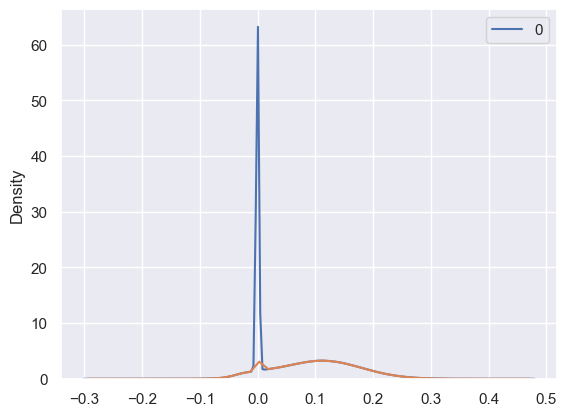

In [13]:
sns.kdeplot(x)
plt.plot(eval_points, y_sk)

In [15]:
kde_sp = gaussian_kde(x, bw_method=0.001)
y_sp = kde_sp.pdf(eval_points)

ValueError: Number of dimensions is greater than number of samples. This results in a singular data covariance matrix, which cannot be treated using the algorithms implemented in `gaussian_kde`. Note that `gaussian_kde` interprets each *column* of `dataset` to be a point; consider transposing the input to `dataset`.

In [ ]:
sns.kdeplot(la_trait_img)
plt.plot(eval_points, y_sk)
plt.plot(eval_points, y_sp)
plt.legend(['seaborn','scikit','scipy'])

In [5]:
from scipy.stats import gaussian_kde
kde = gaussian_kde(la_trait_img)
f = kde.covariance_factor()
bw = f * la_trait_img.std()

In [6]:
x_grid  = np.linspace(np.min(la_trait_img), np.max(la_trait_img))

In [8]:
from pylab import plot
plot(x_grid, kde.evaluate(x_grid))

ValueError: points have dimension 1, dataset has dimension 5218

In [5]:
d1, d2 = la_trait_img.shape
la_trait_img_reshaped = la_trait_img.reshape((d1*d2))
la_trait_img_reshaped.shape

(28798142,)

In [6]:
la_trait_img_reshaped

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [13]:
xmin = la_trait_img_reshaped.min()
xmax = la_trait_img_reshaped.max()
xmin, xmax

(-0.29392788, 0.47192937)

In [15]:
from scipy import stats

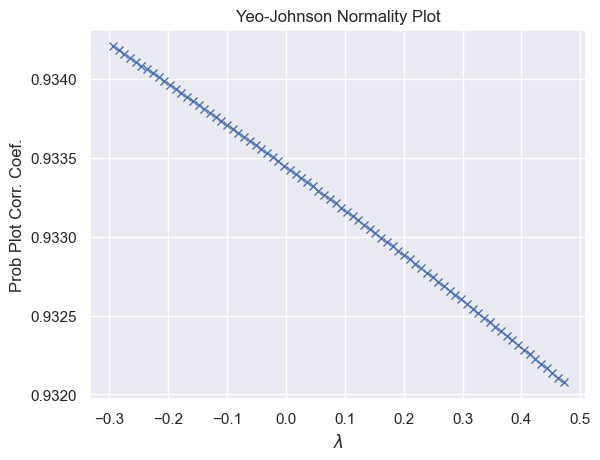

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)
prob = stats.yeojohnson_normplot(la_trait_img_reshaped, xmin, xmax, plot=ax)

In [18]:
_, maxlog = stats.yeojohnson(la_trait_img_reshaped)
ax.axvline(maxlog, color='r')

In [19]:
plt.show()

In [20]:
import numpy as np
import scipy.stats as stats

kde = stats.gaussian_kde(la_trait_img_reshaped)
xs = np.linspace(xmin, xmax, num=500)
y1 = kde(xs)
kde.set_bandwidth(bw_method='silverman')
# y2 = kde(xs)
# kde.set_bandwidth(bw_method=kde.factor / 3.)
# y3 = kde(xs)

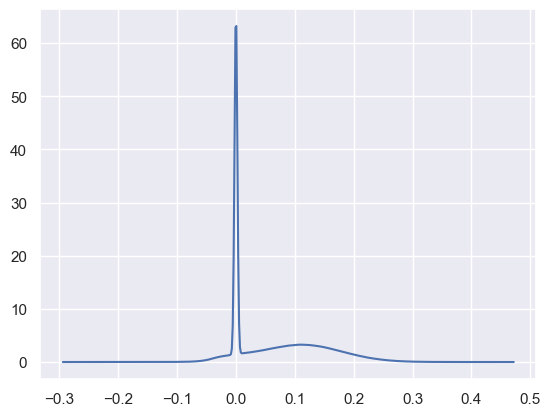

In [21]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
# ax.plot(x1, np.full(x1.shape, 1 / (4. * x1.size)), 'bo',
# #         label='Data points (rescaled)')
ax.plot(xs, y1, label='Scott (default)')
